## Correlation Analysis
---

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### NAS-Bench-101
**Features:**
- adjacency
- operations
- \# of trainable parameters
- network depth

In [34]:
from dataset import NASBench101Dataset

dataset = NASBench101Dataset(hdf5_file='data/nasbench101.hdf5')

In [35]:
val_accs, test_acc = [], []
adj_list, ops_list = [], []
num_weights, net_depths = [], []
num_vertices = []

for arch in dataset:
    val_accs.append(arch['val_acc'])
    test_acc.append(arch['test_acc'])
    adj_list.append(arch['adjacency'])
    ops_list.append(arch['operations'])
    num_weights.append(arch['trainable_parameters'])
    net_depths.append(arch['depth'])
    num_vertices.append(arch['num_vertices'])
    
val_accs = np.array(val_accs)
test_acc = np.array(test_acc)
adj_list = np.array(adj_list)
ops_list = np.array(ops_list)
num_weights = np.array(num_weights)
net_depths = np.array(net_depths)
num_vertices = np.array(num_vertices)

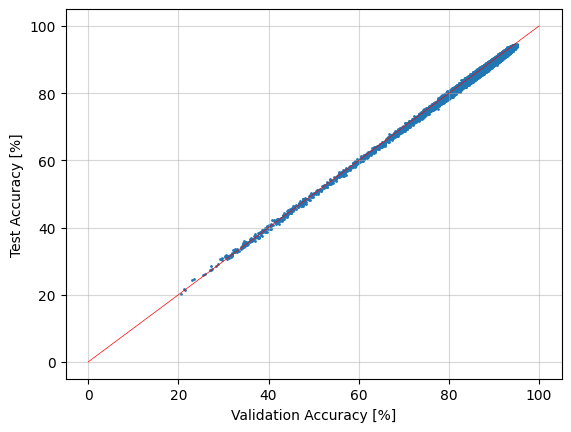

In [43]:
# Correlation between validation and test accuracy
val_accs_perc = np.array(val_accs) * 100
test_acc_perc = np.array(test_acc) * 100

plt.scatter(val_accs_perc, test_acc_perc, s=1)
plt.plot([0, 100], [0, 100], color='red', linestyle='-', linewidth=0.5)
plt.grid(alpha=0.5)
plt.xlabel('Validation Accuracy [%]')
plt.ylabel('Test Accuracy [%]')
plt.show()

In [37]:
# Print correlation coefficient
from scipy.stats import pearsonr
print('Correlation coefficient: %.4f' % pearsonr(val_accs, test_acc)[0])

Correlation coefficient: 0.9945


In [38]:
# Get new features
def count_operation_types(operations):
    unique, counts = np.unique(operations, return_counts=True)
    operation_counts = dict(zip(unique, counts))
    return operation_counts

# Calculate derived scalar features
num_connections = np.array([np.sum(matrix) for matrix in adj_list])
avg_connections_per_vertex = num_connections / num_vertices

operation_counts = [count_operation_types(ops) for ops in ops_list]
conv3x3_count = np.array([op_count.get(0, 0) for op_count in operation_counts])
conv1x1_count = np.array([op_count.get(1, 0) for op_count in operation_counts])
maxpool3x3_count = np.array([op_count.get(2, 0) for op_count in operation_counts])

In [39]:
# Create a DataFrame with the derived features
data = pd.DataFrame({"num_connections": num_connections,
                     "avg_connections_per_vertex": avg_connections_per_vertex,
                     "conv3x3_count": conv3x3_count,
                     "conv1x1_count": conv1x1_count,
                     "validation_accuracy": val_accs})

# Calculate the correlation matrix
correlation_matrix = data.corr(method="pearson")

print(correlation_matrix)

                            num_connections  avg_connections_per_vertex  \
num_connections                    1.000000                    0.618094   
avg_connections_per_vertex         0.618094                    1.000000   
conv3x3_count                     -0.343601                    0.522118   
conv1x1_count                      0.343601                   -0.522118   
validation_accuracy                0.087280                    0.130129   

                            conv3x3_count  conv1x1_count  validation_accuracy  
num_connections                 -0.343601       0.343601             0.087280  
avg_connections_per_vertex       0.522118      -0.522118             0.130129  
conv3x3_count                    1.000000      -1.000000             0.065201  
conv1x1_count                   -1.000000       1.000000            -0.065201  
validation_accuracy              0.065201      -0.065201             1.000000  


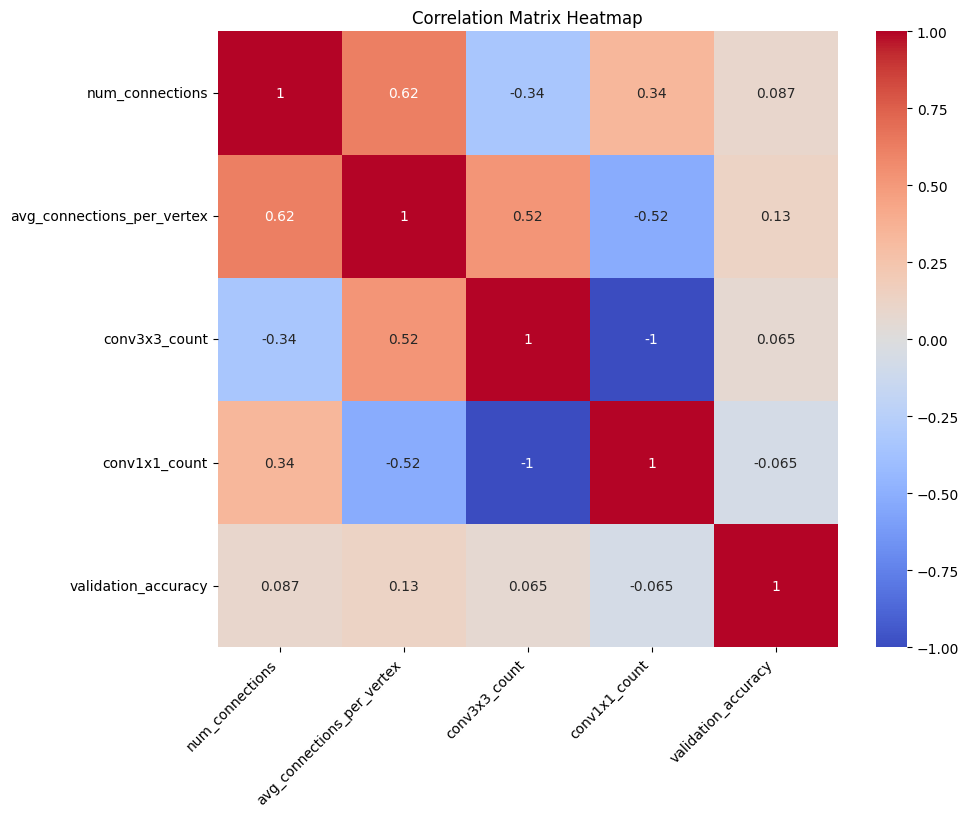

In [40]:

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Customize the plot (optional)
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [41]:
# Create a DataFrame with the features
data = pd.DataFrame({"trainable_params": num_weights,
                     "num_vertices": num_vertices,
                     "network_depth": net_depths,
                     "validation_accuracy": val_accs})

# Calculate the correlation matrix
correlation_matrix = data.corr(method="pearson")

print(correlation_matrix)

                     trainable_params  num_vertices  network_depth  \
trainable_params             1.000000      0.118548       0.205480   
num_vertices                 0.118548      1.000000       0.369457   
network_depth                0.205480      0.369457       1.000000   
validation_accuracy          0.237070     -0.065201      -0.144145   

                     validation_accuracy  
trainable_params                0.237070  
num_vertices                   -0.065201  
network_depth                  -0.144145  
validation_accuracy             1.000000  


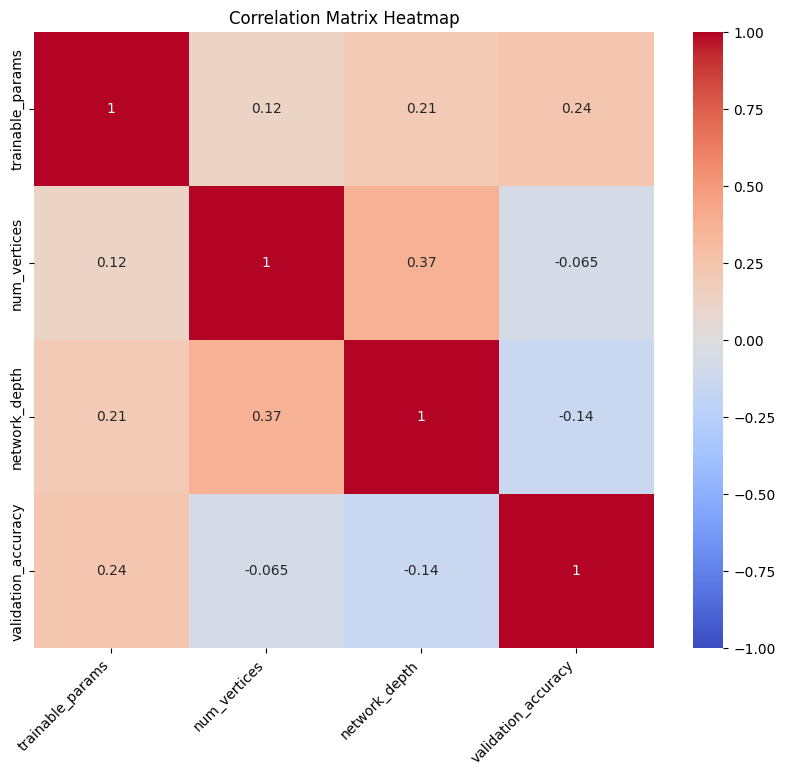

In [42]:

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Customize the plot (optional)
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()